In [1]:
library(ggplot2)
library(tidyverse)
library(readxl)
library("cowplot")
library("gapminder")
library("ggridges") 
library("scales")

library(magick)
library(directlabels)
library(ggridges)
library(viridis)
theme_set(theme_half_open())

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ tibble  2.1.3     ✔ purrr   0.3.3
✔ tidyr   1.0.0     ✔ dplyr   0.8.3
✔ readr   1.3.1     ✔ stringr 1.4.0
✔ tibble  2.1.3     ✔ forcats 0.4.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

********************************************************
Note: As of version 1.0.0, cowplot does not change the
  default ggplot2 theme anymore. To recover the previous
  behavior, execute:
  theme_set(theme_cowplot())
********************************************************


Attaching package: ‘ggridges’

The following object is masked from ‘package:ggplot2’:

    scale_discrete_manual


Attaching package: ‘scales’

The following object is masked from ‘package:purrr’:

    discard

The following object is masked from ‘package:readr’:

    col_factor

Linking to ImageMagick 6.9.9.39
Enabled features: cairo, 

In [2]:
df <- read_csv("../data/tab1.csv")

Warning message:
“Missing column names filled in: 'X1' [1]”Parsed with column specification:
cols(
  X1 = col_double(),
  date = col_date(format = ""),
  year = col_double(),
  company = col_character(),
  price = col_double(),
  monthly_return = col_double(),
  volatility = col_double()
)


In [3]:
head(df)

X1,date,year,company,price,monthly_return,volatility
<dbl>,<date>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
0,2000-01-01,2000,Microsoft,39.81,NA,7.23
1,2000-02-01,2000,Microsoft,36.35,-0.09,7.23
2,2000-03-01,2000,Microsoft,43.22,0.19,7.23
3,2000-04-01,2000,Microsoft,28.37,-0.34,7.23
4,2000-05-01,2000,Microsoft,25.45,-0.10,7.23
5,2000-06-01,2000,Microsoft,32.54,0.28,7.23


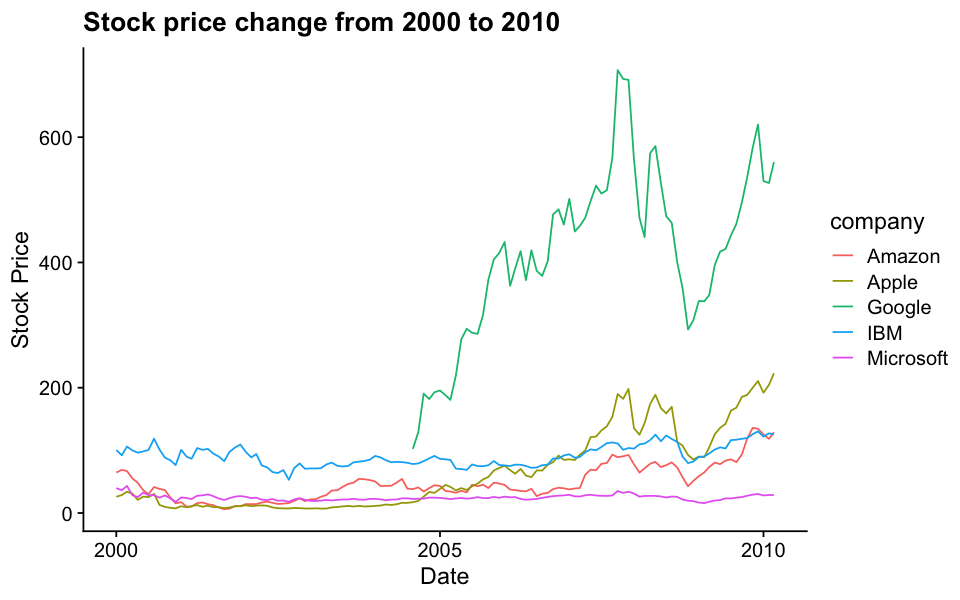

In [4]:
options(repr.plot.width = 8, repr.plot.height = 5)
df %>%
    ggplot(aes(x = date, y = price, group = company, color = company)) +
    geom_line() +
    ggtitle("Stock price change from 2000 to 2010") +
    labs(x = "Date",
         y = "Stock Price")

Warning message:
“Removed 5 rows containing missing values (position_stack).”

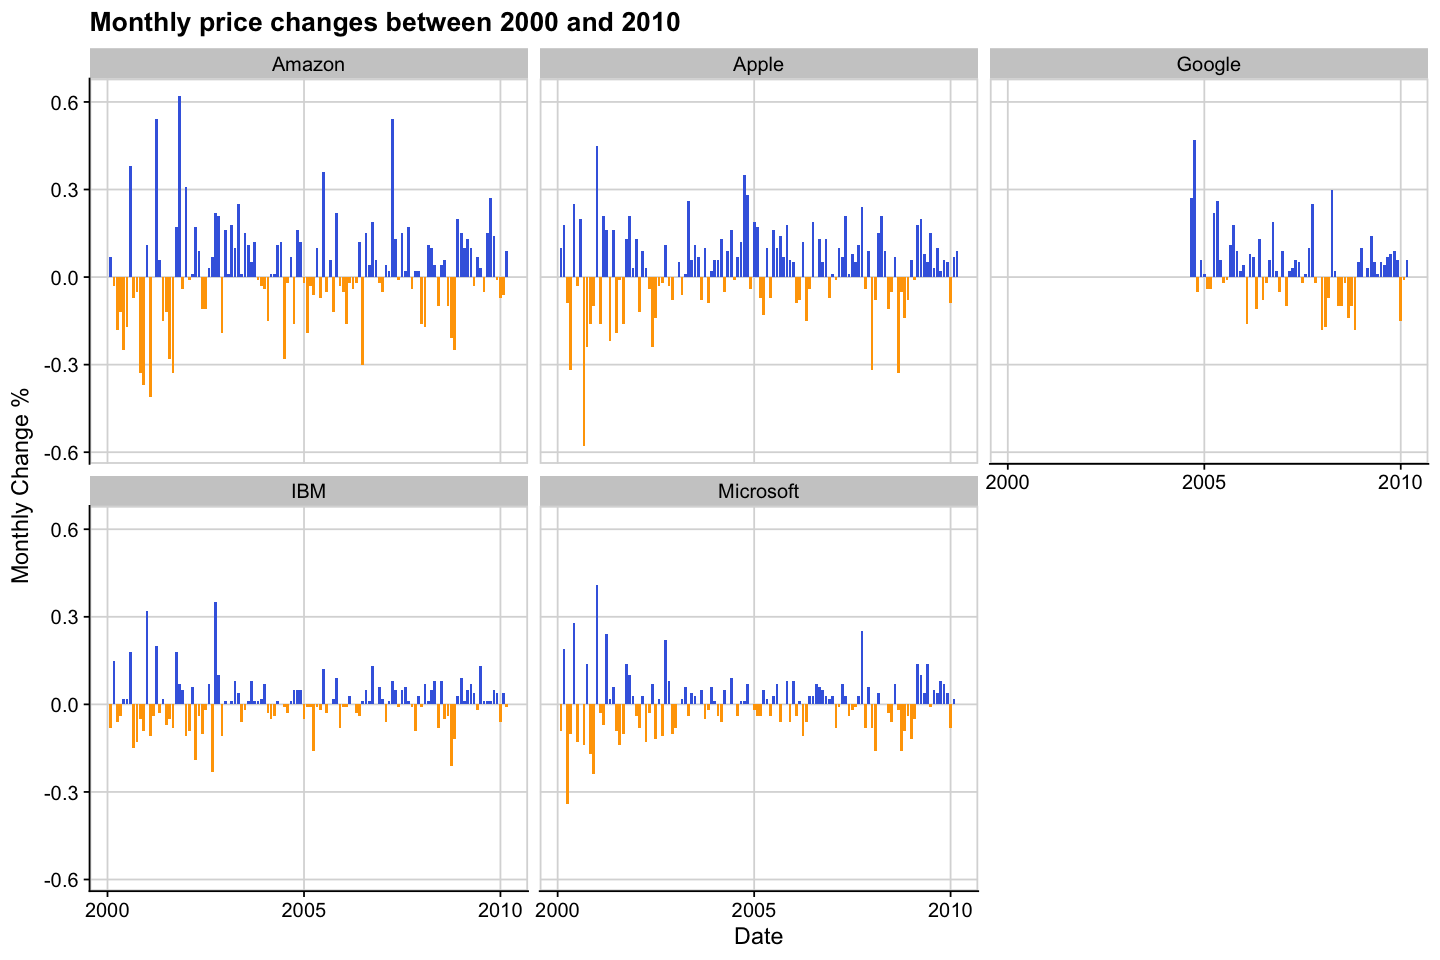

In [5]:
options(tidyverse.quiet = TRUE,
        repr.plot.width = 12,
        repr.plot.height = 8)

df %>% 
    ggplot(aes(x = date, y = monthly_return, fill = (monthly_return > 0))) + 
    geom_bar(stat = "identity") +
    labs(x = "Date",
         y = "Monthly Change %",
         title = "Monthly price changes between 2000 and 2010") +
    scale_fill_manual(values = c("orange", "royalblue")) +
    theme(legend.title = element_blank(), legend.position = "none") +
    facet_wrap(~ company, nrow = 2) +
    panel_border() +
    background_grid()


In [7]:
df2 <- read_csv("../data/tab2.csv")

Warning message:
“Missing column names filled in: 'X1' [1]”Parsed with column specification:
cols(
  X1 = col_double(),
  company = col_character(),
  date = col_date(format = ""),
  price = col_double(),
  year = col_double(),
  monthly_return = col_double(),
  volatility = col_double(),
  shares = col_double(),
  inv_value = col_double()
)


In [8]:
head(df2)

X1,company,date,price,year,monthly_return,volatility,shares,inv_value
<dbl>,<chr>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,Microsoft,2004-08-01,22.47,2004,-0.04,1.24,445.04,10000.05
1,Microsoft,2004-09-01,22.76,2004,0.01,1.24,445.04,10129.11
2,Microsoft,2004-10-01,23.02,2004,0.01,1.24,445.04,10244.82
3,Microsoft,2004-11-01,24.60,2004,0.07,1.24,445.04,10947.98
4,Microsoft,2004-12-01,24.52,2004,0.00,1.24,445.04,10912.38
5,Microsoft,2005-01-01,24.11,2005,-0.02,0.97,445.04,10729.91


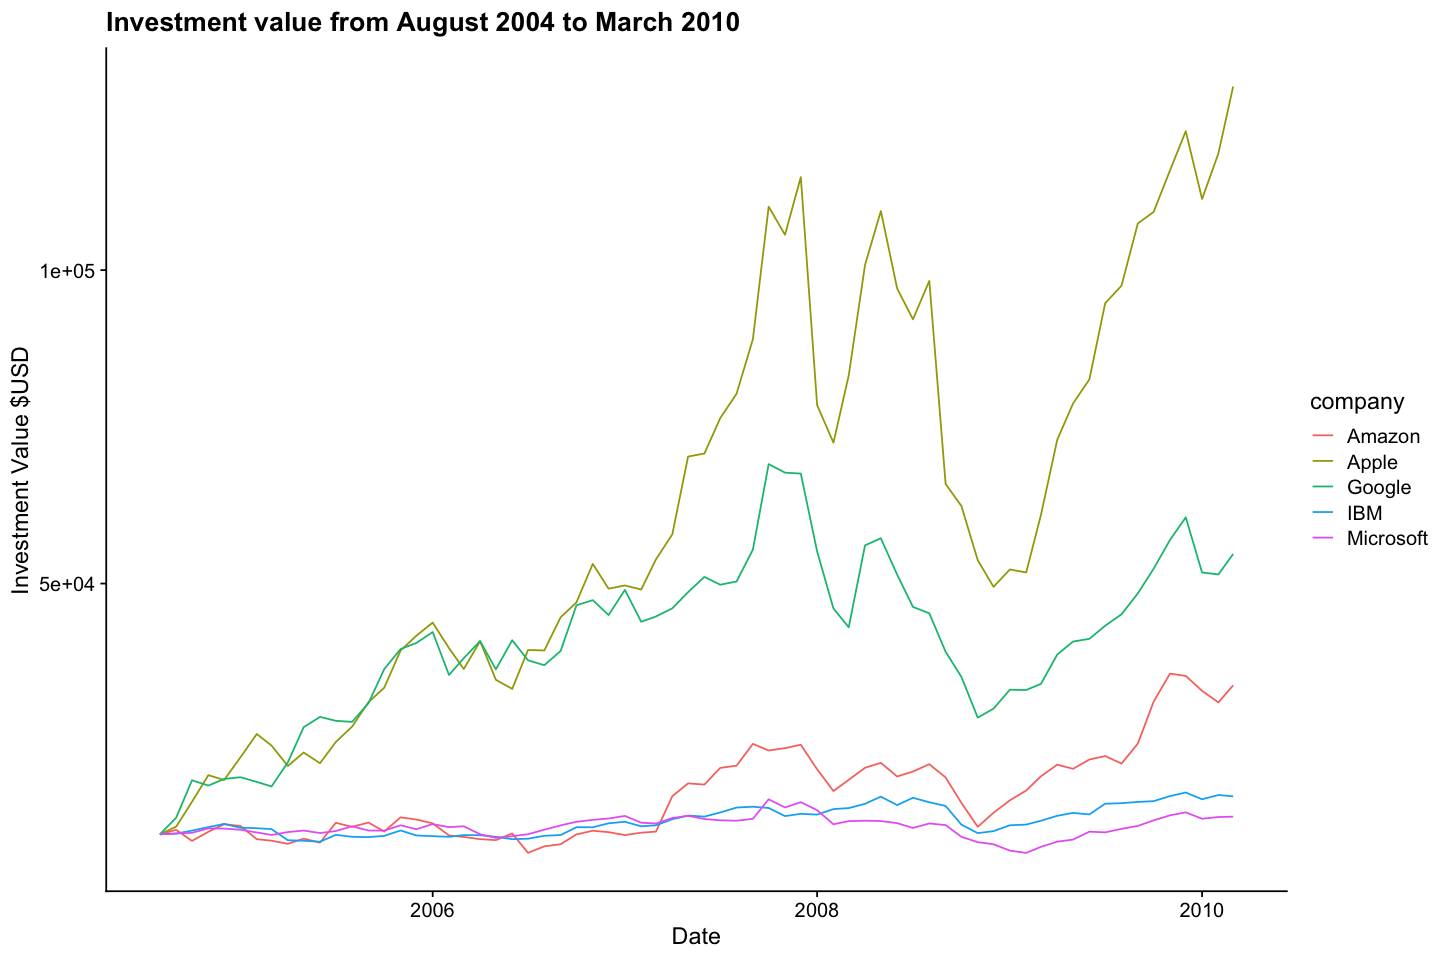

In [9]:
df2 %>%
    ggplot(aes(x = date, y = inv_value, group = company, color = company)) +
    geom_line() +
    ggtitle("Investment value from August 2004 to March 2010") +
    labs(x = "Date",
         y = "Investment Value $USD")